

# Project: Investigate a Dataset (Investigate TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> The data set which will be analyzed in this project is the TMDb movie data (cleaned from original data on Kaggle), This data set contains information about 10,000 movies collected from The Movie Database (TMDb), it has many beneficial attribute which are:

The questions which we will try to answers are
- Which genres are most popular from year to year?
- Which year has the highest number of movies release?
- Did the revenue increase whenever the budget increase?

In [39]:
#  this cell to set up import statements for all of the packages that we plan to use.

import csv
import pandas as pd     # To handle data
import numpy as np      # For number computing
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

from datetime import datetime

%matplotlib inline

plt.rcParams["figure.figsize"] = [15, 10]

<a id='wrangling'></a>
## Data Wrangling

>After observing the data set we will remove the column that unrealavt to us to make the process more easier.

### General Properties

In [21]:
#loading the csv files which contains the movies dataset and assign them to the variable df_movies
df_movies = pd.read_csv(r'C:\Users\akh91\Desktop\tmdb-movies.csv')

In [22]:
#display the first ten rows
df_movies.head(10)

#information about the dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning (Removing the unused information from the dataset)


<b>We notice from the information shown above</b>


>1- Drop unused columns.
<br>2- Removing the duplicacy in the rows(if any).
<br>3- Replace the zeros in revenue and budget column with the average value of each.
<br>4. Changing release date column into date format.

1- Drop unused columns.
   unused columns are imdb_id, original_title, cast, homepage, director, tagline, keywords, overview, vote_count, runtime, vote_average, budget_adj, and revenue_adj.

In [23]:
df_movies = df_movies.drop([ 'imdb_id', 'original_title','cast','homepage','tagline','keywords','overview','vote_count','runtime','vote_average','budget_adj','revenue_adj'], axis=1)

2- Removing the duplicacy in the rows(if any).

In [24]:
df_movies.drop_duplicates() 

,id,popularity,budget,revenue,director,genres,production_companies,release_date,release_year
0,135397,32.985763,150000000,1513528810,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,76341,28.419936,150000000,378436354,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,262500,13.112507,110000000,295238201,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,140607,11.173104,200000000,2068178225,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,168259,9.335014,190000000,1506249360,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015
...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,Bruce Brown,Documentary,Bruce Brown Films,6/15/66,1966
10862,20379,0.065543,0,0,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,1966
10863,39768,0.065141,0,0,Eldar Ryazanov,Mystery|Comedy,Mosfilm,1/1/66,1966
10864,21449,0.064317,0,0,Woody Allen,Action|Comedy,Benedict Pictures Corp.,11/2/66,1966


3- Replace the zeros in revenue and budget column with the average value of each.

In [25]:
df_movies=df_movies.mask(df_movies==0).fillna(df_movies.mean())

4. Changing release date column into date format.

In [26]:
df_movies.release_date = pd.to_datetime(df_movies['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (which genres are most popular from year to year?)

In [27]:
#function returns the most popular genres givin a year

def popular_genre(year):
    
    #group the data by the specific year
    df = df_movies[df_movies['release_year'] == year]
        
    #separate the genres by '|'
    df = df['genres'].str.cat(sep = '|')
    
    
        
    #giving pandas series and storing the values separately
    df = pd.Series(df.split('|'))
    
    #arranging in descending order
    count = df.value_counts(ascending = False)
 
    #create two lists to store the genres and their frequent
    value = []
    c = []
    for val, cnt in count.iteritems():
         value.append(val)
         c.append(cnt)
        
    #Dictionary contain the release year with the highest frequent genre and their number
    data = { 'year': year  , 'genres' : value[0] , 'count' : c[0]}
        
          
    
    return  data

In [45]:
#get the uniqe years in the dataset
years = df_movies.release_year.unique().tolist()

#sort the years
years = sorted(years)

#create three lists to store the release years, genres, and their counts
year =[]
genres=[]
count=[]
for t in years:
    info = popular_genre(t)
    year.append(info['year'])
    genres.append(info['genres'])
    count.append(info['count'])
    print ("in the ",info['year']," year the most popular genre was \"",info['genres'],"\"")



in the  1960  year the most popular genre was " Drama "
in the  1961  year the most popular genre was " Drama "
in the  1962  year the most popular genre was " Drama "
in the  1963  year the most popular genre was " Comedy "
in the  1964  year the most popular genre was " Drama "
in the  1965  year the most popular genre was " Drama "
in the  1966  year the most popular genre was " Comedy "
in the  1967  year the most popular genre was " Comedy "
in the  1968  year the most popular genre was " Drama "
in the  1969  year the most popular genre was " Drama "
in the  1970  year the most popular genre was " Drama "
in the  1971  year the most popular genre was " Drama "
in the  1972  year the most popular genre was " Drama "
in the  1973  year the most popular genre was " Drama "
in the  1974  year the most popular genre was " Drama "
in the  1975  year the most popular genre was " Drama "
in the  1976  year the most popular genre was " Drama "
in the  1977  year the most popular genre was

According to the results shown above, we notice that since 1960 the most movies release belong to the drama genre,
in some years the movies released belong to the comedy genre 

### Research Question 2  (Which year has the highest number of movies release?)

Text(0, 0.5, 'Number Of Movies')

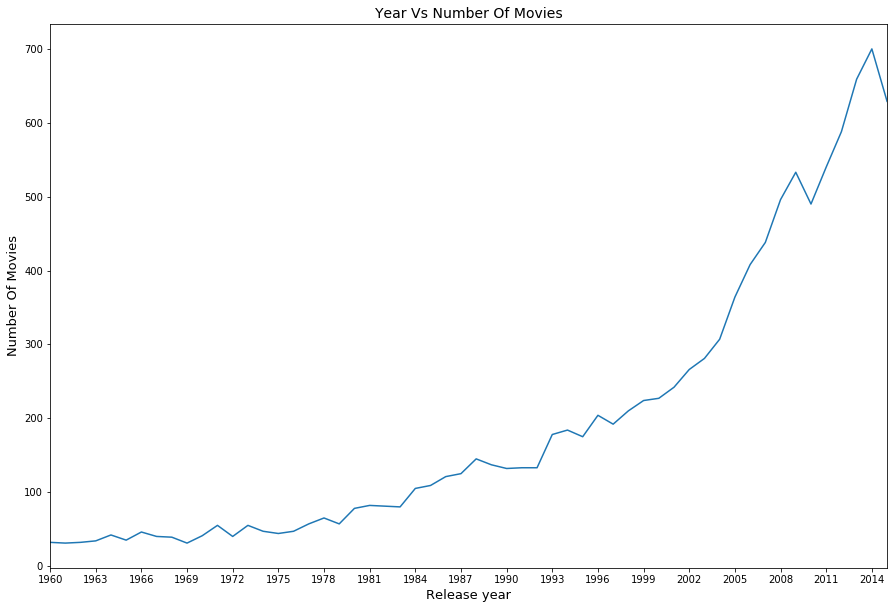

In [46]:
#group the data by the year and count the number of movies in each year
data=df_movies.groupby('release_year').count()['id']



df_movies.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,3))

#set the plot title, x label and y label
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)


According to the plot, we can find that the movies release becoming more over the years

### Research Question 3  (did the revenue increase whenever the budget increase?)

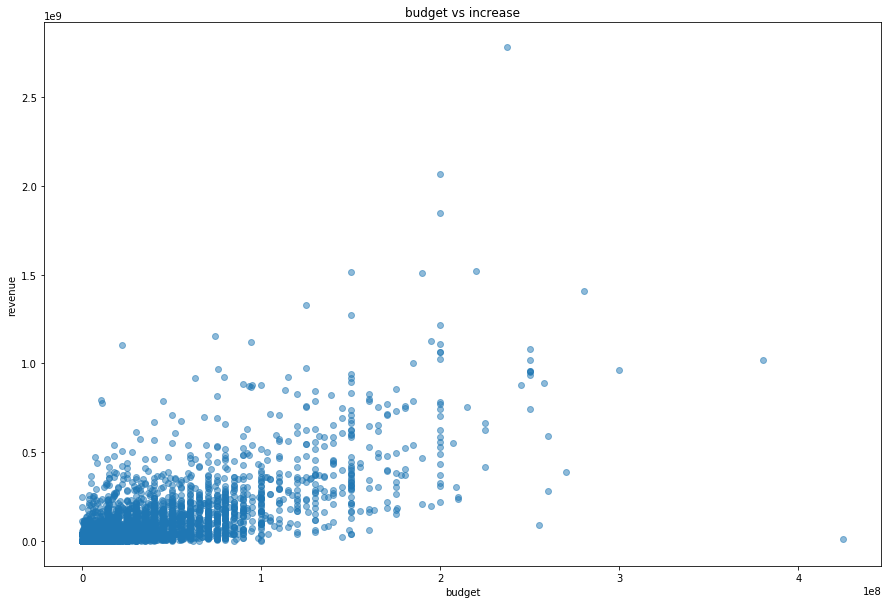

In [48]:
#assign the revenues to the x-axis 
#assign the budget to the y-axis
y = df_movies['revenue']
x = df_movies['budget']


# Plot
plt.scatter(x, y, alpha=0.5)

#set the plot title, x label and y label
plt.title('budget vs increase')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.show()

In the scatter plot we notice that the relation between the budget and revenue is a direct correlation, which means the revenue almost will become greater when the budget spending increase

###### <a id='conclusions'></a>
## Conclusions

<ul>
<li> Drama is the most popular genre, following by comedy.  </li>
<li> The number of movie releases become more over the years.  </li>
<li> There is a correlation between the budget and revenue. </li>
</ul>

## limitation

<ul>
<li> In the data processing, dealing with genres takes more time since we need to separate them by '|' into lists.  </li>
<li> some rows contain 0 budget and revenue and we replaced them by the mean, this will affect the accuracy of the result since we assume their values as the mean.  </li>   
</ul>